In [ ]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

import os

from tqdm.autonotebook import tqdm

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/drought_tracks/../../../ndrought/wrangle.py:17: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [ ]:
cwd = '/pool0/home/steinadi/data/drought/drought_impact/data/thresh_experiments'

In [ ]:
track_dir = f'{cwd}/spi30d/track'

In [ ]:
files = os.listdir('/pool0/home/steinadi/data/drought/drought_impact/data/thresh_experiments/spi30d/track')

In [ ]:
def groupby_intervals(data:pd.DataFrame, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163]):
    grp_obj = data.groupby(pd.cut(data.lifetime, bins=bins))
    keys = [key for key in grp_obj.groups.keys()]
    return grp_obj, keys

In [ ]:
all_dtd = {}
all_summ = {}
all_summ_grp = {}
all_grp_obj = {}

for file in tqdm(files):
    dtd = dnw.convert_pickle_to_dtd(f'{track_dir}/{file}')
    for key in dtd.keys():
        var_tracks = dtd[key]
        trimmed_tracks = []
        for track in var_tracks:
            if len(track) > 0:
                trimmed_tracks.append(track)
        dtd[key] = trimmed_tracks
    dtd = dnw.prune_tracks(dtd)

    summ, summ_grp = dnw.compute_track_summary_characterization(dtd, 5)
    grp_obj, __ = groupby_intervals(summ)

    all_dtd[file] = dtd
    all_summ[file] = summ
    all_summ_grp[file] = summ_grp
    all_grp_obj[file] = grp_obj

  0%|          | 0/154 [00:00<?, ?it/s]

100%|██████████| 154/154 [00:55<00:00,  2.77it/s]


In [ ]:
files[0]

'track_2600a_02r_1m.pickle'

In [ ]:
files[1]

'track_3000a_05r_1m.pickle'

In [ ]:
a_dtd = all_dtd[files[0]]
b_dtd = all_dtd[files[1]]

Going to check for intersection via matching centroids

In [ ]:
a_centroids = []
for x_track, y_track in zip(a_dtd['x'], a_dtd['y']):
    a_track = []
    for x, y in zip(x_track, y_track):
        a_track.append((x,y))
    a_centroids.append(a_track)

In [ ]:
b_centroids = []
for x_track, y_track in zip(b_dtd['x'], b_dtd['y']):
    b_track = []
    for x, y in zip(x_track, y_track):
        b_track.append((x,y))
    b_centroids.append(b_track)

In [ ]:
set(a_centroids[0]).intersection(set(b_centroids[0]))

{(-1610325.7471674485, 2119488.052314829),
 (-1571570.0245035838, 1734107.4392276728),
 (-1545994.3245700502, 2016772.914360173),
 (-1535572.326442618, 1736768.1506924948),
 (-1500892.0485978585, 1944114.3299084126),
 (-1497851.8488662886, 1656227.3223112836),
 (-1481210.6351459937, 1697100.9346354639),
 (-1477751.869329266, 1987117.5889168398),
 (-1446969.0689210466, 1874453.106058316),
 (-1438732.2108074718, 1915067.7892930054),
 (-1394136.7005437938, 1622647.6598410083),
 (-1339471.130044508, 1597698.6916846274),
 (-1111177.962130963, 2581696.785090651)}

In [ ]:
set(a_centroids[0]).intersection(set(b_centroids[1]))

set()

In [ ]:
match = []

for i, a_cent_track in enumerate(a_centroids):
    a_set = set(a_cent_track)
    for j, b_cent_track in enumerate(b_centroids):
        if len(a_set.intersection(set(b_cent_track))) > 0:
            match.append((i,j))

In [ ]:
match

[(0, 0),
 (1, 1),
 (3, 2),
 (3, 4),
 (4, 3),
 (5, 5),
 (7, 6),
 (8, 7),
 (9, 8),
 (10, 9),
 (11, 10),
 (12, 11),
 (13, 12),
 (14, 13),
 (16, 14),
 (17, 15),
 (18, 16),
 (20, 17),
 (22, 18),
 (23, 19),
 (24, 20),
 (24, 23),
 (25, 21),
 (26, 24),
 (27, 25),
 (28, 26),
 (29, 28),
 (30, 29),
 (32, 30),
 (32, 32),
 (33, 31),
 (34, 34),
 (35, 35),
 (36, 36),
 (36, 37),
 (37, 38),
 (38, 39),
 (39, 40),
 (40, 41),
 (41, 42),
 (42, 43),
 (43, 44),
 (44, 45),
 (45, 46),
 (46, 47),
 (47, 48),
 (48, 49),
 (49, 50),
 (50, 51),
 (50, 52),
 (51, 53),
 (52, 54),
 (54, 56),
 (54, 57),
 (54, 58),
 (54, 59),
 (55, 60),
 (56, 61),
 (57, 62),
 (59, 63),
 (60, 64),
 (61, 65),
 (62, 66),
 (63, 67),
 (64, 68),
 (65, 69),
 (66, 70),
 (67, 71),
 (68, 72),
 (70, 73),
 (71, 74),
 (72, 75),
 (73, 76),
 (75, 77),
 (76, 78),
 (77, 79),
 (78, 80),
 (80, 81),
 (80, 82),
 (81, 83),
 (82, 84),
 (83, 85),
 (84, 88),
 (85, 87),
 (87, 89),
 (88, 90),
 (89, 92),
 (90, 93),
 (91, 94),
 (92, 95),
 (93, 96),
 (94, 97),
 (95, 9

I already see a split with (3,2) and (3,4) ... lets check that

In [ ]:
a_centroids[3]

[(-1745531.952038946, 1452804.8370184896),
 (-1743402.7399713076, 1479763.4872182976),
 (-1470778.3484528293, 1848148.3247250007),
 (-1431607.5791167282, 1872720.2888943795),
 (-1423414.1513186991, 1940834.102747977),
 (-1418062.0388124015, 2128349.0918501792),
 (-1467150.3092288978, 2295610.2727636313),
 (-1445697.7454244948, 2387771.981863282),
 (-1437343.825772789, 2580969.505318814),
 (-1468069.6884649177, 2582962.454708406),
 (-1534486.0133529475, 2726016.566192095),
 (-1578474.2109592857, 2692563.295888313),
 (-1633421.691092592, 2702344.7549398565),
 (-1694585.760812059, 2664625.149872259),
 (-1694585.760812059, 2664625.149872259),
 (-1393079.30140563, 2658529.813084518),
 (-2147156.839784166, 1912253.0416068682),
 (-2150810.435856819, 1917108.7576000853),
 (-2157528.266695095, 1911445.7910603993),
 (-2046124.7867830205, 1971008.3359800475),
 (-2176308.712882461, 1935291.902368198),
 (-2172188.819860534, 1897381.7710797472)]

In [ ]:
set(a_centroids[3]).intersection(set(b_centroids[2]))

{(-1745531.952038946, 1452804.8370184896),
 (-1743402.7399713076, 1479763.4872182976),
 (-1633421.691092592, 2702344.7549398565),
 (-1578474.2109592857, 2692563.295888313),
 (-1534486.0133529475, 2726016.566192095),
 (-1470778.3484528293, 1848148.3247250007),
 (-1468069.6884649177, 2582962.454708406),
 (-1467150.3092288978, 2295610.2727636313),
 (-1445697.7454244948, 2387771.981863282),
 (-1437343.825772789, 2580969.505318814),
 (-1431607.5791167282, 1872720.2888943795),
 (-1423414.1513186991, 1940834.102747977),
 (-1418062.0388124015, 2128349.0918501792)}

In [ ]:
set(a_centroids[3]).intersection(set(b_centroids[4]))

{(-2157528.266695095, 1911445.7910603993),
 (-2150810.435856819, 1917108.7576000853),
 (-2147156.839784166, 1912253.0416068682)}

Sure enough, it's a split. But these three:  
- (-1694585.760812059, 2664625.149872259),
- (-1694585.760812059, 2664625.149872259),
- (-1393079.30140563, 2658529.813084518)

Aren't included in either part of the split

Let's check if the drought networks actually have more origins

In [ ]:
files[0]

'track_2600a_02r_1m.pickle'

In [ ]:
len(dnet.DroughtNetwork.unpickle(f'{cwd}/spi30d/dnet/net_2600a_02r_1m.pickle').origins)

917

In [ ]:
len(a_centroids)

479

In [ ]:
files[1]

'track_3000a_05r_1m.pickle'

In [ ]:
len(dnet.DroughtNetwork.unpickle(f'{cwd}/spi30d/dnet/net_3000a_05r_1m.pickle').origins)

827

In [ ]:
len(b_centroids)

491

Interesting. So there isn't more origins, but there are more tracks.

Let's follow them and see where they go

first off I need to get my files in the proper order

In [ ]:
metric_thresh = 1
area_thresh = np.arange(400, 3000+200, 200)
ratio_thresh = np.arange(0, 1+0.1, 0.1)

files = []
for a_thresh in area_thresh:
        for r_thresh in ratio_thresh:
            key = f'{a_thresh}a_0{int(r_thresh*10)}r_{metric_thresh}m'
            files.append(f'track_{key}.pickle')

In [ ]:
files[0].split('_')

['track', '400a', '00r', '1m.pickle']

In [ ]:
class TrackNode():

    def __init__(self, track, file, ti):
        """

        Parameters
        ----------
        file: str
            Which file the tracks come from
        ti: int
            Which track index within a dtd (drought track dictionary)
        """
        self.track = track
        self.track_set = set(track)
        self.file = file
        self.ti = ti
        file_args = file.split('_')
        self.at = np.float64(file_args[1][:-1])
        self.rt = np.float64(file_args[2][:-1])/10
        self.next = []
        self.last = []

    def __iter__(self):
        yield self
        for node in self.next:
            yield node
    
    def __repr__(self):
        return f'file: {self.file}, ti: {self.ti}'
    
    def __str__(self):
        next_nodes = [(node.file, node.ti) for node in self.next]
        return f'file: {self.file}, ti:{self.ti}, next:{next_nodes}'
    
    def __eq__(self, other):
        if isinstance(other, TrackNode):
            return(
                (self.file == other.file) and
                (self.ti == other.ti) and
                (np.array_equal(self.track, other.track))
            )
        
    def check_intersect(self, other):
        return len(self.track_set.intersection(other.track_set)) > 0

In [ ]:
all_centroids = {}

for file in files:
    dtd = all_dtd[file]
    dtd_centroids = []
    for x_track, y_track in zip(dtd['x'], dtd['y']):
        track_centroids = []
        for x, y in zip(x_track, y_track):
            track_centroids.append((x,y))
        dtd_centroids.append(track_centroids)
    all_centroids[file] = dtd_centroids

In [ ]:
import pickle

def to_pickle(self, path):
        f = open(path, 'wb')
        pickle.dump(self, f, pickle.HIGHEST_PROTOCOL)
        f.close()

def unpickle(path):
    with open(path, 'rb') as f:
        unpickler = pickle.Unpickler(f)
        return unpickler.load()

In [ ]:
if not os.path.exists(f'{cwd}/spi30d/tracknodes.pickle'):

    all_tracknodes = {}

    for file in files:
        file_centroids = all_centroids[file]
        file_tracknodes = []
        for i, track in enumerate(file_centroids):
            file_tracknodes.append(TrackNode(track, file, i))
        all_tracknodes[file] = file_tracknodes

    t = tqdm(total=len(files)**2)

    for file_a in files:
        a_nodes = all_tracknodes[file_a]
        for file_b in files:
            if file_a != file_b:
                b_nodes = all_tracknodes[file_b]
                for node_a in a_nodes:
                    for node_b in b_nodes:
                        if node_a.check_intersect(node_b):
                            del_rt = node_b.rt - node_a.rt
                            del_at = node_b.at - node_a.at
                            # want connections to be only 1 change away,
                            # so either rt changes or at changes, 
                            # not both
                            if del_at == 200 and del_rt == 0:
                                # then a goes to b
                                #print(node_a, node_b, del_rt, del_at)
                                node_a.next.append(node_b)
                                node_b.last.append(node_a)
                            elif del_at == 0:
                                if del_rt == 0.1:
                                    #print(node_a, node_b, del_rt, del_at)
                                    node_a.next.append(node_b)
                                    node_b.last.append(node_a)
                                elif del_rt == - 0.1:
                                    # can't be equivalent, so something must be different
                                    node_b.next.append(node_a)
                                    node_a.last.append(node_b)
                                elif del_rt == 0:
                                    raise Exception(f'Equivalency error {del_rt}')
                            elif del_at == -200 and del_rt == 0:
                                node_b.next.append(node_a)
                                node_a.last.append(node_b)
            t.update()

    sys.setrecursionlimit(100000)
    
    f = open(f'{cwd}/spi30d/tracknodes.pickle', 'wb')
    pickle.dump(all_tracknodes, f, pickle.HIGHEST_PROTOCOL)
    f.close()
    
else:
    with open(f'{cwd}/spi30d/tracknodes.pickle', 'rb') as f:
        unpickler = pickle.Unpickler(f)
        all_tracknodes = unpickler.load()

In [ ]:
all_tracknodes[files[0]][0].next[0] in all_tracknodes[files[0]][0].next

True

In [ ]:
files_index = {file:i for i, file in enumerate(files)}
index_files = {i:file for i, file in enumerate(files)}

In [ ]:
adj_dict = {}

for file in files:
    fi = files_index[file]
    for tracknode in all_tracknodes[file]:
        ti= tracknode.ti
        key = f"({fi},{ti})"
        if not key in adj_dict.keys():
            adj_dict[key] = []
        for node in tracknode.next:
            val = f'({files_index[node.file]},{node.ti})'
            adj_dict[key].append(val)

In [ ]:
len(adj_dict)

105088

So this is currently a little too big to draw with networkx, let's try to pull out a thread

In [ ]:
search_keys = [list(adj_dict.keys())[0]]
found_keys = []

while len(search_keys) > 0:
    search = search_keys.pop()
    try:
        for key in adj_dict[search]:
            search_keys.append(key)
    except:
        pass
    found_keys.append(search)

mini_adj_dict = dict()

for key in found_keys:
    try:
        mini_adj_dict[key] = adj_dict[key]
    except:
        pass

In [ ]:
mini_adj_dict

{'(0,0)': ['(1,0)', '(11,0)', '(1,0)', '(11,0)'],
 '(11,0)': ['(12,0)', '(22,0)', '(22,2)', '(12,0)', '(22,0)', '(22,2)'],
 '(22,2)': ['(23,3)', '(33,2)', '(23,3)', '(33,2)'],
 '(33,2)': ['(34,3)', '(44,2)', '(34,3)', '(44,2)'],
 '(44,2)': ['(45,3)', '(55,2)', '(45,3)', '(55,2)'],
 '(55,2)': ['(56,3)', '(66,2)', '(56,3)', '(66,2)'],
 '(66,2)': ['(67,3)', '(77,2)', '(67,3)', '(77,2)'],
 '(77,2)': ['(78,3)', '(88,2)', '(78,3)', '(88,2)'],
 '(88,2)': ['(89,3)', '(99,1)', '(89,3)', '(99,1)'],
 '(99,1)': ['(100,2)', '(110,1)', '(100,2)', '(110,1)'],
 '(110,1)': ['(111,2)', '(121,1)', '(111,2)', '(121,1)'],
 '(121,1)': ['(122,2)', '(122,2)'],
 '(122,2)': ['(123,2)', '(123,2)'],
 '(123,2)': [],
 '(111,2)': ['(112,2)', '(122,2)', '(112,2)', '(122,2)'],
 '(112,2)': ['(123,2)', '(123,2)'],
 '(100,2)': ['(101,2)', '(111,2)', '(101,2)', '(111,2)'],
 '(101,2)': ['(112,2)', '(112,2)'],
 '(89,3)': ['(90,3)', '(100,2)', '(90,3)', '(100,2)'],
 '(90,3)': ['(101,2)', '(101,2)'],
 '(78,3)': ['(79,3)', '(8

In [ ]:
import networkx as nx

In [ ]:
dg = nx.DiGraph(mini_adj_dict)

In [ ]:
# networkx took care of the duplicates
dg.nodes

NodeView(('(0,0)', '(11,0)', '(22,2)', '(33,2)', '(44,2)', '(55,2)', '(66,2)', '(77,2)', '(88,2)', '(99,1)', '(110,1)', '(121,1)', '(122,2)', '(123,2)', '(111,2)', '(112,2)', '(100,2)', '(101,2)', '(89,3)', '(90,3)', '(78,3)', '(79,3)', '(67,3)', '(68,3)', '(56,3)', '(57,3)', '(45,3)', '(46,3)', '(34,3)', '(35,3)', '(23,3)', '(24,3)', '(22,0)', '(33,0)', '(44,0)', '(55,0)', '(66,0)', '(77,0)', '(88,0)', '(99,0)', '(110,0)', '(121,0)', '(132,0)', '(143,0)', '(144,0)', '(145,0)', '(133,0)', '(134,0)', '(122,0)', '(123,0)', '(111,0)', '(112,0)', '(100,0)', '(101,0)', '(89,0)', '(90,0)', '(78,0)', '(79,0)', '(67,0)', '(68,0)', '(56,0)', '(57,0)', '(45,0)', '(46,0)', '(34,0)', '(35,0)', '(23,0)', '(24,0)', '(12,0)', '(13,0)', '(1,0)', '(2,0)'))

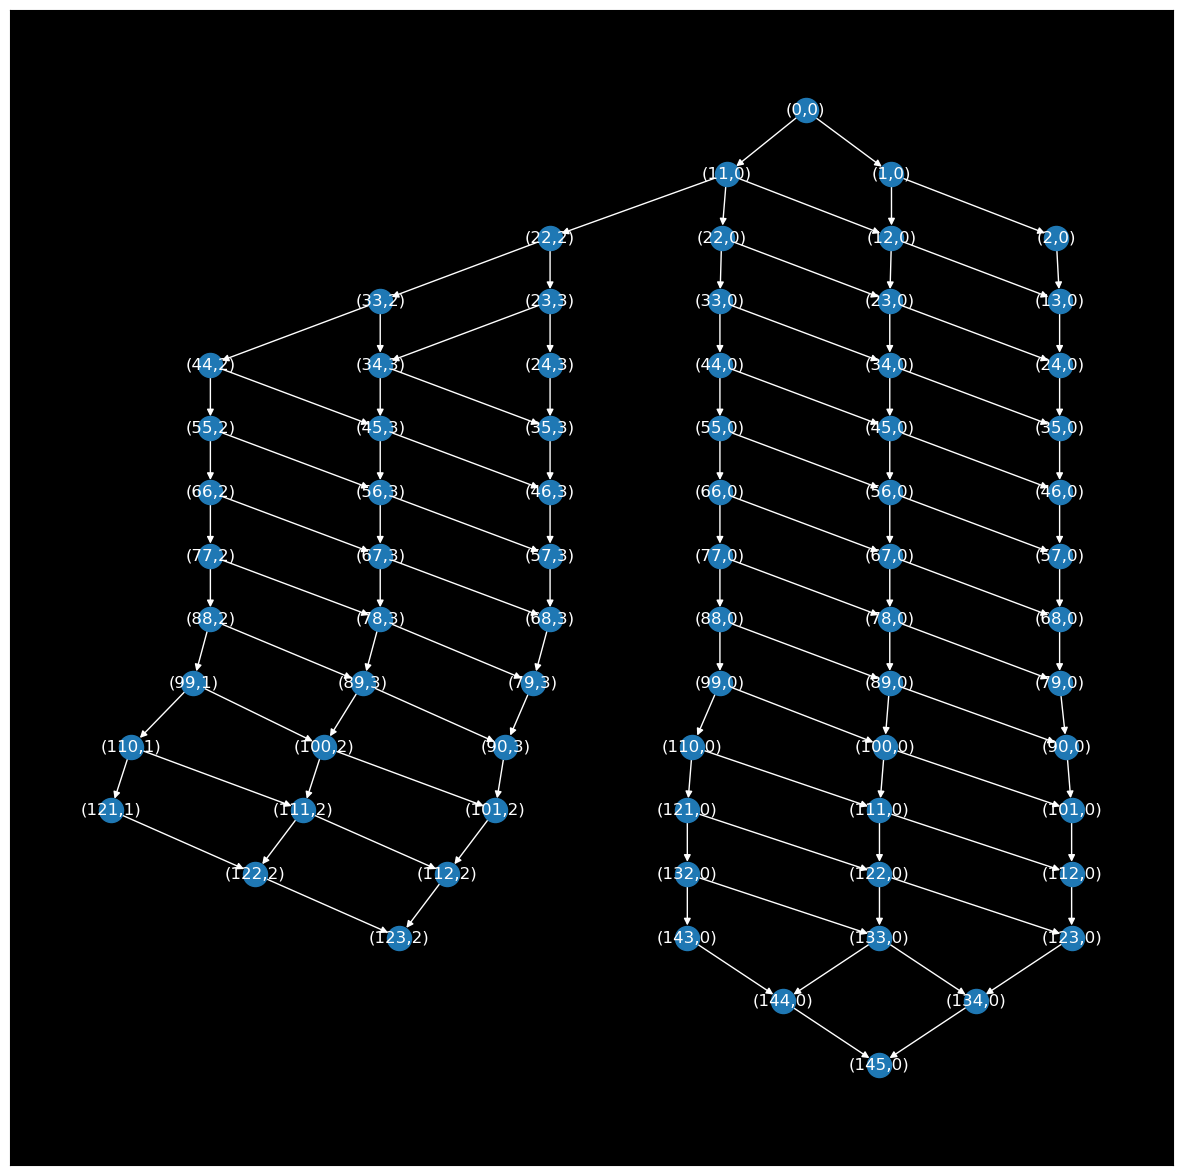

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

pos = nx.drawing.nx_agraph.graphviz_layout(dg, prog='dot')
nx.draw_networkx(dg, pos=pos, ax=ax, font_color='w', edge_color='w')
ax.set_facecolor('k')

the following code block takes a SUPER long time to run to get all of them

In [ ]:
super_adj_dict = {}
mini_adj_dicts = []

for super_key in tqdm(list(adj_dict.keys())[7::11**3]):
    search_keys = [super_key]
    found_keys = []

    while len(search_keys) > 0:
        search = search_keys.pop()
        try:
            for key in adj_dict[search]:
                search_keys.append(key)
        except:
            pass
        found_keys.append(search)

    mini_adj_dict = dict()

    for key in found_keys:
        try:
            mini_adj_dict[key] = adj_dict[key]
        except:
            pass
    mini_adj_dicts.append(mini_adj_dict)

    super_adj_dict[super_key] = len(mini_adj_dict)
    #print(len(mini_adj_dict))
#super_adj_dict

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████| 79/79 [00:00<00:00, 167.40it/s]


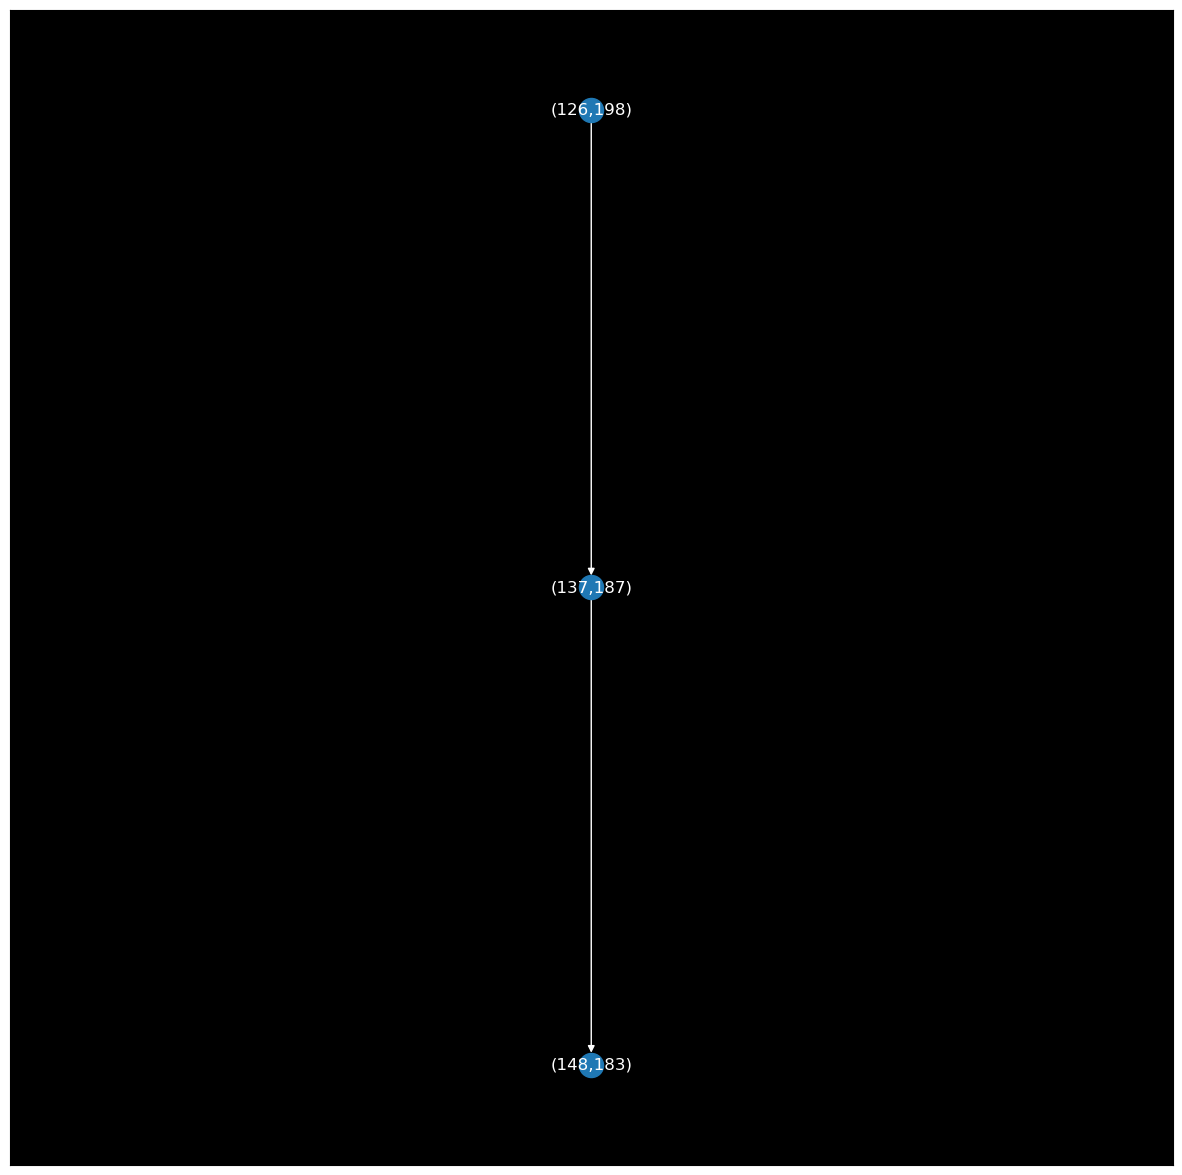

In [ ]:
i = 69

select_mini_adj_dict = mini_adj_dicts[i]

dg = nx.DiGraph(select_mini_adj_dict)

fig, ax = plt.subplots(figsize=(15,15))

pos = nx.drawing.nx_agraph.graphviz_layout(dg, prog='dot')
nx.draw_networkx(dg, pos=pos, ax=ax, font_color='w', edge_color='w')
ax.set_facecolor('k')

Running first 20 observations:
- lattice structure
- intersections occur more with AT increases
- track splitting occurs with AT and RT increases
- not seeing more than RT=0.2 in thread

thread 22 is large and kind of interesting, but still has only a width going from RT=0 to RT=0.2

no other notable observations running from 0 to 55*11 at increments of 11

Running 7::44 observations:
- some track numbers drop as file number increases ... I believe this is because there are fewer tracks (that or there is some really coincidental intersections)

Running 7::11**3
- no new observations

In [ ]:
search_keys = [list(adj_dict.keys())[0]]
found_keys = []

while len(search_keys) > 0:
    search = search_keys.pop()
    try:
        for key in adj_dict[search]:
            search_keys.append(key)
    except:
        pass
    found_keys.append(search)

mini_adj_dict = dict()

for key in found_keys:
    try:
        mini_adj_dict[key] = adj_dict[key]
    except:
        pass

In [ ]:
dg = nx.DiGraph(mini_adj_dict)

In [ ]:
mini_nodes = list(dg.nodes)

In [ ]:
def extract_node(node_str):
    args = node_str.split(',')
    fi = np.int64(args[0][1:])
    ti = np.int64(args[1][:-1])

    return fi, ti

In [ ]:
mini_nodes[-1]

'(2,0)'

In [ ]:
extract_node(mini_nodes[-1])

(2, 0)

In [ ]:
all_tracknodes

{'track_400a_00r_1m.pickle': [file: track_400a_00r_1m.pickle, ti: 0,
  file: track_400a_00r_1m.pickle, ti: 1,
  file: track_400a_00r_1m.pickle, ti: 2,
  file: track_400a_00r_1m.pickle, ti: 3,
  file: track_400a_00r_1m.pickle, ti: 4,
  file: track_400a_00r_1m.pickle, ti: 5,
  file: track_400a_00r_1m.pickle, ti: 6,
  file: track_400a_00r_1m.pickle, ti: 7,
  file: track_400a_00r_1m.pickle, ti: 8,
  file: track_400a_00r_1m.pickle, ti: 9,
  file: track_400a_00r_1m.pickle, ti: 10,
  file: track_400a_00r_1m.pickle, ti: 11,
  file: track_400a_00r_1m.pickle, ti: 12,
  file: track_400a_00r_1m.pickle, ti: 13,
  file: track_400a_00r_1m.pickle, ti: 14,
  file: track_400a_00r_1m.pickle, ti: 15,
  file: track_400a_00r_1m.pickle, ti: 16,
  file: track_400a_00r_1m.pickle, ti: 17,
  file: track_400a_00r_1m.pickle, ti: 18,
  file: track_400a_00r_1m.pickle, ti: 19,
  file: track_400a_00r_1m.pickle, ti: 20,
  file: track_400a_00r_1m.pickle, ti: 21,
  file: track_400a_00r_1m.pickle, ti: 22,
  file: track_40

In [ ]:
found_nodes = []

for node_str in mini_nodes:
    fi, ti = extract_node(node_str)
    file = index_files[fi]
    found_nodes.append(all_tracknodes[file][ti])

In [ ]:
found_nodes

[file: track_400a_00r_1m.pickle, ti: 0,
 file: track_600a_00r_1m.pickle, ti: 0,
 file: track_800a_00r_1m.pickle, ti: 2,
 file: track_1000a_00r_1m.pickle, ti: 2,
 file: track_1200a_00r_1m.pickle, ti: 2,
 file: track_1400a_00r_1m.pickle, ti: 2,
 file: track_1600a_00r_1m.pickle, ti: 2,
 file: track_1800a_00r_1m.pickle, ti: 2,
 file: track_2000a_00r_1m.pickle, ti: 2,
 file: track_2200a_00r_1m.pickle, ti: 1,
 file: track_2400a_00r_1m.pickle, ti: 1,
 file: track_2600a_00r_1m.pickle, ti: 1,
 file: track_2600a_01r_1m.pickle, ti: 2,
 file: track_2600a_02r_1m.pickle, ti: 2,
 file: track_2400a_01r_1m.pickle, ti: 2,
 file: track_2400a_02r_1m.pickle, ti: 2,
 file: track_2200a_01r_1m.pickle, ti: 2,
 file: track_2200a_02r_1m.pickle, ti: 2,
 file: track_2000a_01r_1m.pickle, ti: 3,
 file: track_2000a_02r_1m.pickle, ti: 3,
 file: track_1800a_01r_1m.pickle, ti: 3,
 file: track_1800a_02r_1m.pickle, ti: 3,
 file: track_1600a_01r_1m.pickle, ti: 3,
 file: track_1600a_02r_1m.pickle, ti: 3,
 file: track_1400a_

In [ ]:
# we have double everywhere, so this will select out the first half
# which is the same as the second half
found_nodes[0].next[:np.int64(len(found_nodes[0].next)/2)]

[file: track_400a_01r_1m.pickle, ti: 0, file: track_600a_00r_1m.pickle, ti: 0]

now I want to systematically pick the node that follows a specific path

In [ ]:
current_node = found_nodes[0]
next_nodes = found_nodes[0].next[:np.int64(len(found_nodes[0].next)/2)]

for node in next_nodes:
    if node.at - current_node.at == 200:
        print(node.file)

track_600a_00r_1m.pickle


In [ ]:
search_nodes = [found_nodes[0]]
thread_nodes = []

while len(search_nodes) > 0:
    current_node = search_nodes.pop()
    thread_nodes.append(current_node)
    next_nodes = current_node.next[:np.int64(len(current_node.next)/2)]

    for node in next_nodes:
        if node.at - current_node.at == 200:
            search_nodes.append(node)

In [ ]:
thread_nodes

[file: track_400a_00r_1m.pickle, ti: 0,
 file: track_600a_00r_1m.pickle, ti: 0,
 file: track_800a_00r_1m.pickle, ti: 2,
 file: track_1000a_00r_1m.pickle, ti: 2,
 file: track_1200a_00r_1m.pickle, ti: 2,
 file: track_1400a_00r_1m.pickle, ti: 2,
 file: track_1600a_00r_1m.pickle, ti: 2,
 file: track_1800a_00r_1m.pickle, ti: 2,
 file: track_2000a_00r_1m.pickle, ti: 2,
 file: track_2200a_00r_1m.pickle, ti: 1,
 file: track_2400a_00r_1m.pickle, ti: 1,
 file: track_2600a_00r_1m.pickle, ti: 1,
 file: track_800a_00r_1m.pickle, ti: 0,
 file: track_1000a_00r_1m.pickle, ti: 0,
 file: track_1200a_00r_1m.pickle, ti: 0,
 file: track_1400a_00r_1m.pickle, ti: 0,
 file: track_1600a_00r_1m.pickle, ti: 0,
 file: track_1800a_00r_1m.pickle, ti: 0,
 file: track_2000a_00r_1m.pickle, ti: 0,
 file: track_2200a_00r_1m.pickle, ti: 0,
 file: track_2400a_00r_1m.pickle, ti: 0,
 file: track_2600a_00r_1m.pickle, ti: 0,
 file: track_2800a_00r_1m.pickle, ti: 0,
 file: track_3000a_00r_1m.pickle, ti: 0]

In [ ]:
at_vals = [node.at for node in thread_nodes]
life_vals = [len(node.track) for node in thread_nodes]

Text(0.5, 1.0, 'Trace from file track_400a_00r_1m.pickle')

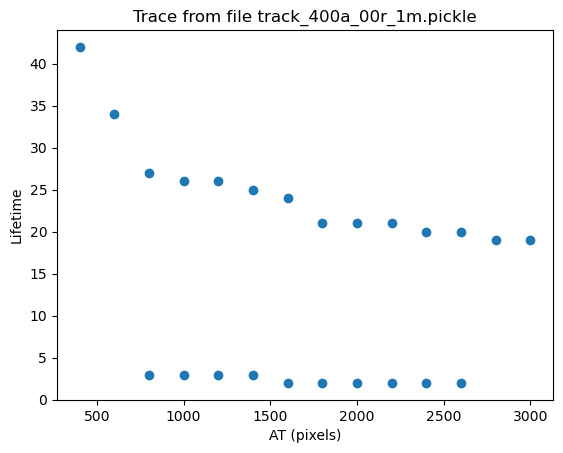

In [ ]:
fig, ax = plt.subplots()

ax.scatter(at_vals, life_vals)
ax.set_ylabel('Lifetime')
ax.set_xlabel('AT (pixels)')
ax.set_title(f'Trace from file {thread_nodes[0].file}')

In [ ]:
thread_files = [node.file for node in thread_nodes]
thread_ti = [node.ti for node in thread_nodes]

In [ ]:
thread_mean_size = []
for file, ti in zip(thread_files, thread_ti):
    thread_mean_size.append(all_dtd[file]['s'][ti].mean())

Text(0.5, 1.0, 'Trace from file track_400a_00r_1m.pickle')

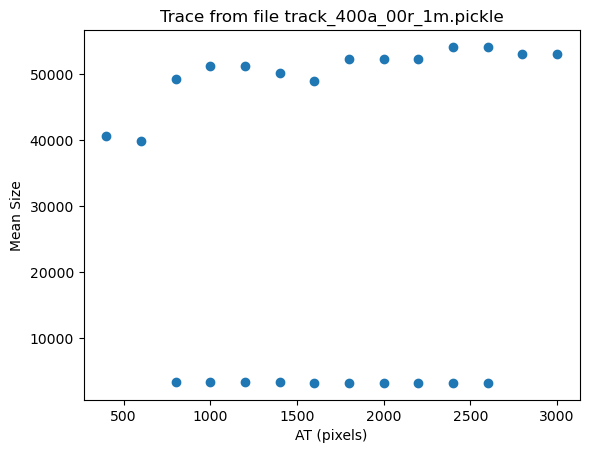

In [ ]:
fig, ax = plt.subplots()

ax.scatter(at_vals, thread_mean_size)
ax.set_ylabel('Mean Size')
ax.set_xlabel('AT (pixels)')
ax.set_title(f'Trace from file {thread_nodes[0].file}')

In [ ]:
thread_distance = []
thread_displacement = []
thread_origins = []
thread_terminations = []

for file, ti in zip(thread_files, thread_ti):
    x = all_dtd[file]['x'][ti]
    y = all_dtd[file]['y'][ti]
    u = all_dtd[file]['u'][ti]
    v = all_dtd[file]['v'][ti]

    thread_distance.append(np.sum(dnw.compute_track_distance(u, v)))
    del_x = u[-1]+x[-1]-(x[0])
    del_y = v[-1]+y[-1]-(y[0])
    thread_displacement.append(dnw.compute_distance(del_x, del_y))

    thread_origins.append([x[0], y[0]])
    thread_terminations.append([x[-1]+u[-1], y[-1]+v[-1]])

AttributeError: 'list' object has no attribute 'sum'